# Fremont-Bridge-Analysis 

### UWSEDS Spring 2020 - Homework #1
#### Juan Solorio

In [1]:
# importing pertinent modules to help with data manipulation and
# plotting of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 1.Read the CSV file into a pandas dataframe. (1 pt)
data_FBridge = pd.read_csv("../data/Fremont_Bridge_Bicycle_Counter.csv", index_col='Date', parse_dates=True)

In [3]:
data_FBridge.dtypes

Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [4]:
print("(Rows, Columns)")
data_FBridge.shape

(Rows, Columns)


(65688, 3)

In [5]:
data_FBridge.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [6]:
# checking for NaNs/null values in each column
data_FBridge.isnull().sum(axis=0)

Fremont Bridge Total            10
Fremont Bridge East Sidewalk    10
Fremont Bridge West Sidewalk    10
dtype: int64

In [7]:
# 2. Add columns to the dataframe containing: ( 3 pt)
#   -The total (East + West) bicycle count
data_FBridge['Total bicycle count'] = (
    data_FBridge['Fremont Bridge East Sidewalk'] + data_FBridge['Fremont Bridge West Sidewalk'])

#   -The hour of the day
data_FBridge['Hour'] = data_FBridge.index.strftime("%H")

#   -The year
data_FBridge['Year'] = data_FBridge.index.year

print("Rows:\t",data_FBridge.shape[0],"\nColumns:",data_FBridge.shape[1])
data_FBridge.head()

Rows:	 65688 
Columns: 6


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total bicycle count,Hour,Year
Date,,,,,,
2012-10-03 00:00:00,13.0,4.0,9.0,13.0,00,2012
2012-10-03 01:00:00,10.0,4.0,6.0,10.0,01,2012
2012-10-03 02:00:00,2.0,1.0,1.0,2.0,02,2012
2012-10-03 03:00:00,5.0,2.0,3.0,5.0,03,2012
2012-10-03 04:00:00,7.0,6.0,1.0,7.0,04,2012


In [8]:
# 3. Create a dataframe with the subset of data from the year 2016 (1 pt)
data_2016 = data_FBridge[data_FBridge['Year'] == 2016]
print("Rows:\t",data_2016.shape[0],"\nColumns:",data_2016.shape[1])
data_2016.head() 

Rows:	 8784 
Columns: 6


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total bicycle count,Hour,Year
Date,,,,,,
2016-01-01 00:00:00,18.0,9.0,9.0,18.0,00,2016
2016-01-01 01:00:00,15.0,3.0,12.0,15.0,01,2016
2016-01-01 02:00:00,11.0,6.0,5.0,11.0,02,2016
2016-01-01 03:00:00,7.0,1.0,6.0,7.0,03,2016
2016-01-01 04:00:00,2.0,0.0,2.0,2.0,04,2016


[Text(0, 0.5, 'Daily Average Bicycle Count'), Text(0.5, 0, 'Hour')]

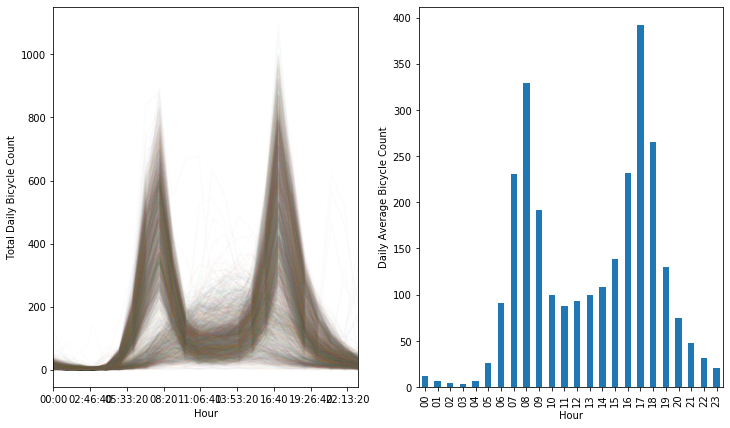

In [9]:
# 4. Use pandas + matplotlib to plot the counts by hour. 
#              (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)
pivotData = data_FBridge.pivot_table('Total bicycle count', index=data_FBridge.index.time, columns=data_FBridge.index.date)

# 5. Use pandas to determine what is (on average) the busiest hour of the day (1 pt)
data_FBridge_HourAvg = data_FBridge[['Total bicycle count']].groupby(data_FBridge['Hour']).mean()

# quick plotting with pandas plot function
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 7))

pivotData.plot(alpha = 0.02, legend=False,ax=axes[0]).set(xlabel='Hour', ylabel='Total Daily Bicycle Count')
data_FBridge_HourAvg.plot(kind='bar', legend=False,ax=axes[1]).set(xlabel='Hour', ylabel='Daily Average Bicycle Count')

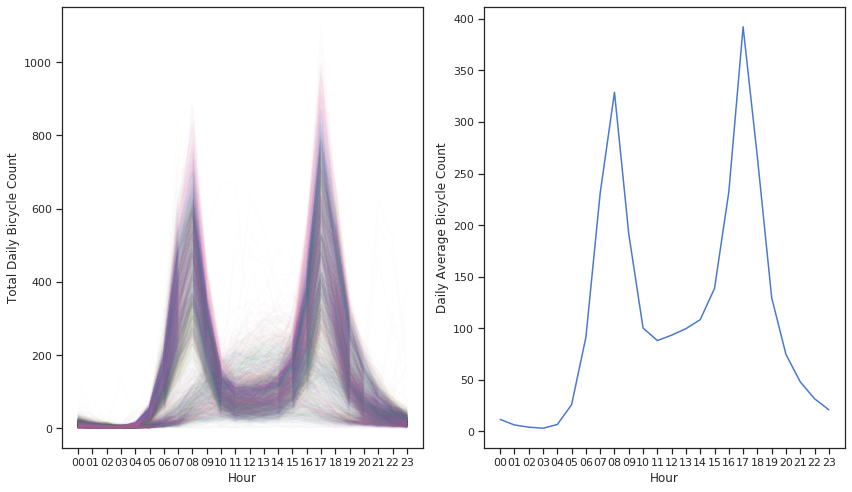

In [10]:
# Plotting using the seaborn library
sns.set(style="ticks", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7), sharex=False)

sns.lineplot(data=data_FBridge, x= 'Hour', y = "Total bicycle count",
                alpha = 0.01, ax=axes[0], legend=False, 
                hue=data_FBridge.index.strftime("%Y-%m-%d")).set(xlabel='Hour', ylabel='Total Daily Bicycle Count')

sns.lineplot(data=data_FBridge_HourAvg, x= data_FBridge_HourAvg.index,y= 'Total bicycle count', 
             ax=axes[1]).set(xlabel='Hour', ylabel='Daily Average Bicycle Count')

plt.tight_layout()

In [11]:
# finding the busiest day of the week, from chart should be between 4pm-6pm (hours 16-18)
busiest_hour_df = data_FBridge_HourAvg[data_FBridge_HourAvg["Total bicycle count"]==
                                       max(data_FBridge_HourAvg["Total bicycle count"])]
print("The busiest hour on average is the",busiest_hour_df.index[0],"hour of the day, \nwith",
      np.round(busiest_hour_df["Total bicycle count"][0]),"total bicycle counts on average")

The busiest hour on average is the 17 hour of the day, 
with 392.0 total bicycle counts on average
